# 타이타닉 생존자 예측하기
## 데이터 읽고 전체적인 상황 확인하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_excel('./data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


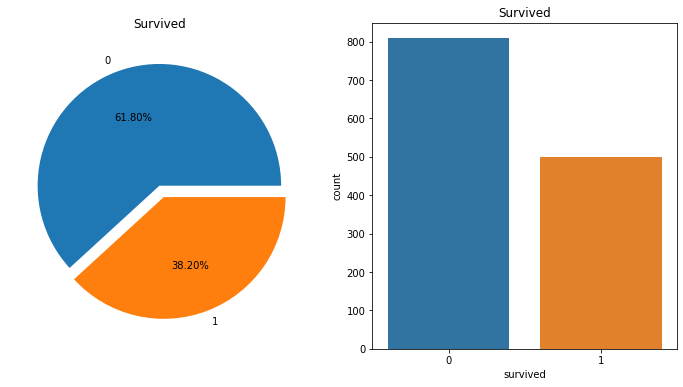

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

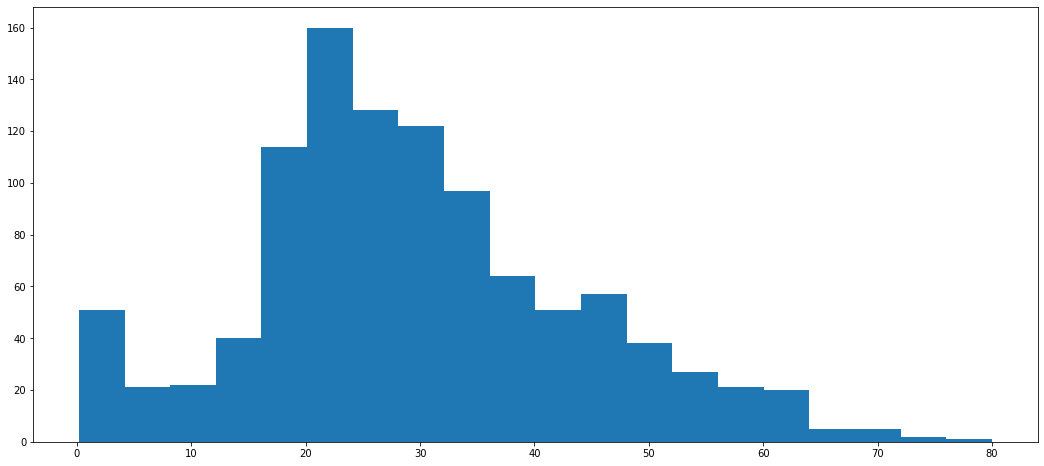

In [6]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [7]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [8]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


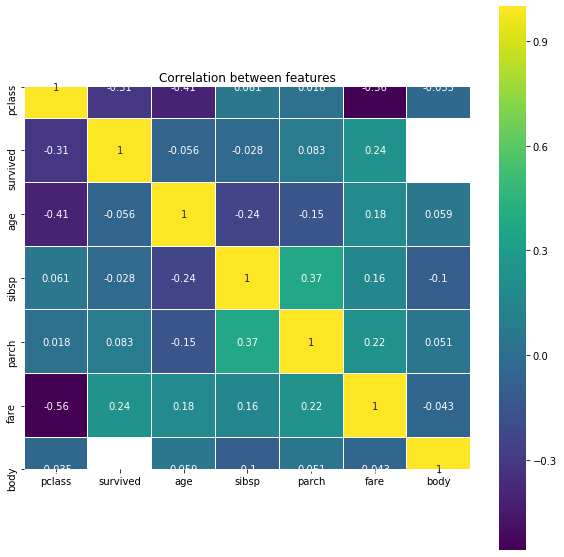

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 나이별 구별 및 성별 생존률 확인하기

In [10]:
raw_data['age_cat'] = pd.cut(raw_data['age'], 
                             bins=[0, 3, 7, 15, 30, 60, 100], 
                             include_lowest=True, 
                             labels=['baby', 'children', 'teenage', 
                                     'young', 'adult', 'old'])
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [11]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


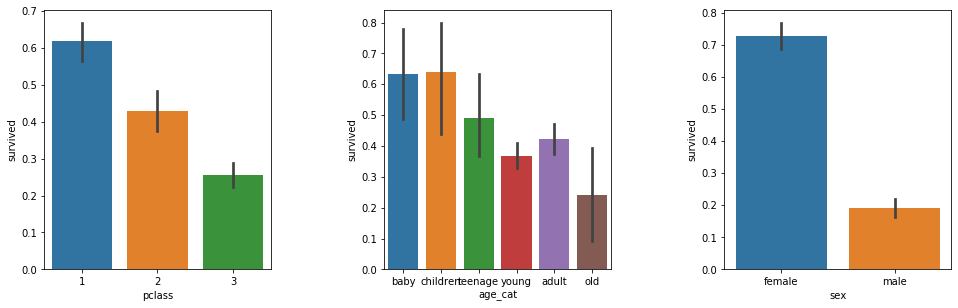

In [12]:
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

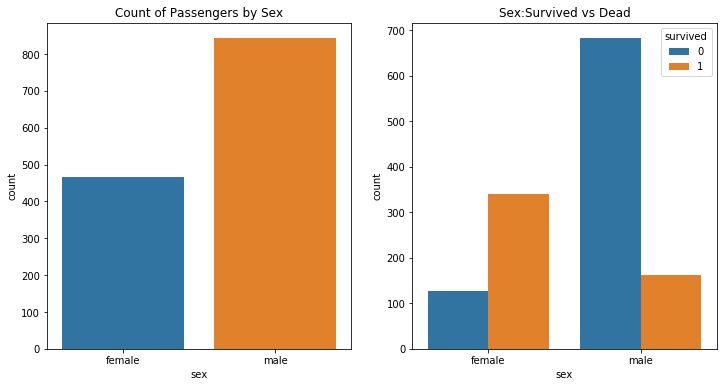

In [13]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 보트 탑승 승객의 생존률 확인하기

In [14]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


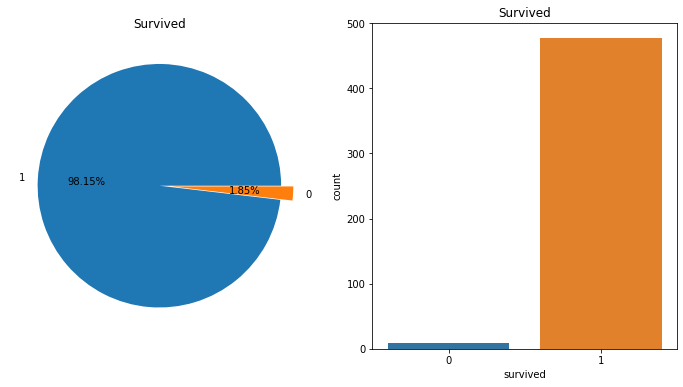

In [15]:
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],
                                                   autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 귀족들의 생존률만 다시 조사해보기

In [16]:
raw_data['name'][0]

'Allen, Miss. Elisabeth Walton'

In [17]:
raw_data['name'][0].split(',')[1]

' Miss. Elisabeth Walton'

In [18]:
raw_data['name'][0].split(',')[1].split('.')[0]

' Miss'

In [19]:
raw_data['name'][0].split(',')[1].split('.')[0].strip()

'Miss'

In [20]:
test = lambda x: x+2
test(2)

4

In [21]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [22]:
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
titles

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [23]:
pd.crosstab(raw_data['title'], raw_data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [24]:
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')
    
raw_data['title'].unique()

array(['Miss', 'Rare', 'Mr', 'Mrs'], dtype=object)

In [25]:
print (raw_data[['title', 'survived']].groupby(['title'], as_index=False).mean())

  title  survived
0  Miss  0.678030
1    Mr  0.162483
2   Mrs  0.787879
3  Rare  0.466667


## 학습하기 위해 데이터를 정리하고, 특징을 선택하기

In [26]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [27]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

In [28]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [29]:
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [30]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null float64
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
age_cat      1045 non-null category
title        1045 non-null object
dtypes: category(1), float64(8), object(7)
memory usage: 131.8+ KB


## 생존자 예측을 위한 모델 수립

In [31]:
train_pre = raw_data[['pclass','sex','age','sibsp','parch','fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, 
                                                    raw_data[['survived']], 
                                                    test_size=0.1, 
                                                    random_state=13)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
pclass    940 non-null float64
sex       940 non-null float64
age       940 non-null float64
sibsp     940 non-null float64
parch     940 non-null float64
fare      940 non-null float64
dtypes: float64(6)
memory usage: 51.4 KB


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
pclass    105 non-null float64
sex       105 non-null float64
age       105 non-null float64
sibsp     105 non-null float64
parch     105 non-null float64
fare      105 non-null float64
dtypes: float64(6)
memory usage: 5.7 KB


In [35]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
survived    940 non-null float64
dtypes: float64(1)
memory usage: 14.7 KB


In [36]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
survived    105 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


In [37]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [38]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8117021276595745


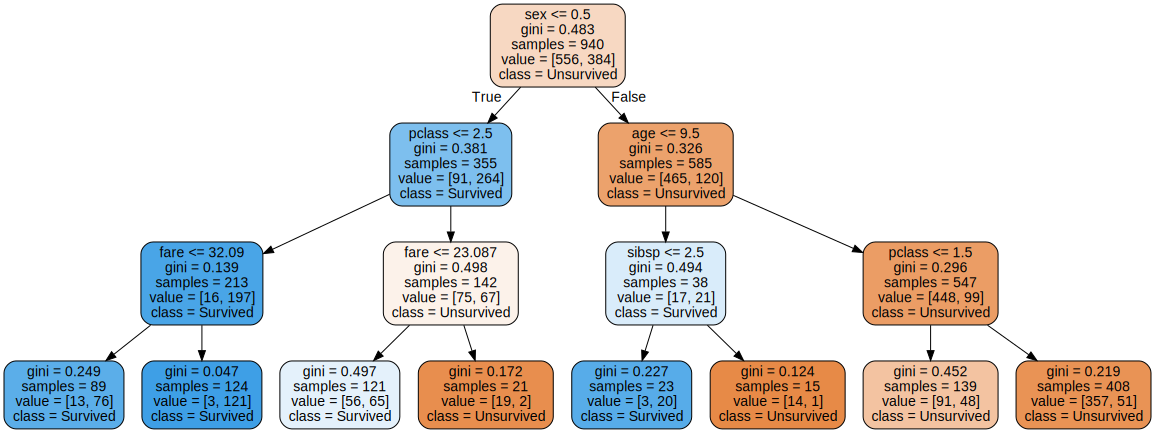

In [40]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

In [41]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  84.76190476190476


## 생존자 예측해보기. 디카프리오는 정말 생존할 수 없었을까

In [42]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

In [43]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [44]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [45]:
def isSurvived(name, person):
    isSurvive = 'not survived' if tree_clf.predict([person])[0] == 0 else 'survived'
    print(name, ' is ', isSurvive, 
          ' --> ', max(tree_clf.predict_proba([person])[0]))
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio  is  not survived  -->  0.875
Winslet  is  survived  -->  0.9758064516129032


In [3]:
import seaborn as sns

In [4]:
sns.pairplot(raw_data, hue='survived')

NameError: name 'raw_data' is not defined